## Creating a Change Map
#### Author: Rishi Anand

In [1]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs
import rioxarray

In [2]:
# Store the URLs for files with data for the start and end dates of the change analysis
urlStart = 's3://nasa-waterinsight/NLDAS3/forcing/hourly/200101/NLDAS_FOR0010_H.A20010101.030.beta.nc'
urlFinish = 's3://nasa-waterinsight/NLDAS3/forcing/hourly/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc'
s3 = s3fs.S3FileSystem({'anon':True})

In [3]:
# Clip the file to a bounding box
# Format of [Min Long, Min Lat, Max Long, Max Lat]
coordsMD = [
    -81.53,37.61,-74.73,40.09
]
# Select the variable to analyze
var = 'Tair'

In [4]:
# Open the file specified in url and plot a variable in the data
dsStart = []
dsFinish = []
with s3.open(urlStart) as infile:
    print("opening", urlStart)
    ds = xr.open_dataset(infile, engine="h5netcdf")
    # Add the coordinate system for rioxarray clipping
    ds.rio.write_crs(4326, inplace=True)
    dsStart.append(ds[var].isel(time=0).rio.clip_box(*coordsMD).to_numpy())
    print("done")
with s3.open(urlFinish) as infile:
    print("opening", urlFinish)
    ds = xr.open_dataset(infile, engine="h5netcdf")
    ds.rio.write_crs(4326, inplace=True)
    dsFinish.append(ds[var].isel(time=0).rio.clip_box(*coordsMD).to_numpy())
    print("done")

opening s3://nasa-waterinsight/NLDAS3/forcing/hourly/200101/NLDAS_FOR0010_H.A20010101.030.beta.nc
done
opening s3://nasa-waterinsight/NLDAS3/forcing/hourly/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc
done


Text(0.5, 1.0, 'MD Tair Change - 01/01/2001 to 01/01/2015')

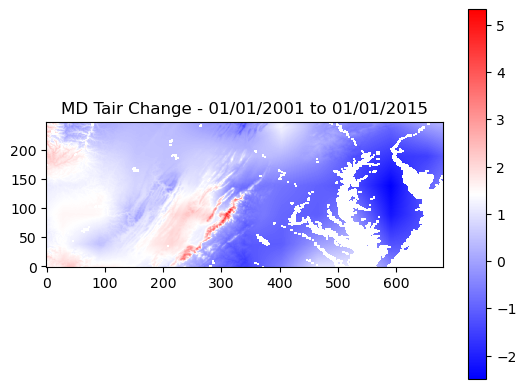

In [5]:
dsChange = dsFinish[0] - dsStart[0]
plt.imshow(dsChange, origin='lower', cmap='bwr')
plt.colorbar()
plt.title('MD '+var+' Change - 01/01/2001 to 01/01/2015')